# Testen unterschiedlicher Verteilungsfunktion zur Wiedergabe der Wegstrecken an Werktagen

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\thoma\Desktop\ev-modelling-repo\Data\NHTS_trips_processed.csv")

In [3]:
df.head()

,ID,Type_day,TRPTRANS,Trip_no,Whyfrom,Whyto,Distance,Trip_duration,Departure_hhmm,Arrival_hhmm,Departure,Arrival,Departure_t
0,300000071,1,3,1,1,4,8.439,15,1000,1015,600,615,40
1,300000071,1,3,2,4,1,8.286,20,1510,1530,910,930,61
2,300000072,1,6,1,2,1,135.191,120,700,900,420,540,28
3,300000072,1,6,2,1,2,131.367,150,1800,2030,1080,1230,72
4,300000073,1,3,1,1,2,3.621,15,845,900,525,540,35


## Filtern nach Werktagen und Wegstrecke > 0

In [7]:
filt = (df["Type_day"] < 6) & (df["Distance"] > 0.0)
data = df[filt]

In [8]:
data.head()

,ID,Type_day,TRPTRANS,Trip_no,Whyfrom,Whyto,Distance,Trip_duration,Departure_hhmm,Arrival_hhmm,Departure,Arrival,Departure_t
0,300000071,1,3,1,1,4,8.439,15,1000,1015,600,615,40
1,300000071,1,3,2,4,1,8.286,20,1510,1530,910,930,61
2,300000072,1,6,1,2,1,135.191,120,700,900,420,540,28
3,300000072,1,6,2,1,2,131.367,150,1800,2030,1080,1230,72
4,300000073,1,3,1,1,2,3.621,15,845,900,525,540,35


## Filtern Start "Zuhause" = 1 Ziel "Arbeit" = 2 

In [9]:
filt = (data["Whyfrom"] == 1) & (data["Whyto"] == 2)
weg_zuhause_arbeit = list(data[filt]["Distance"])

In [10]:
weg_zuhause_arbeit2 = [x for x in weg_zuhause_arbeit if x<150]

[(-10, 100)]

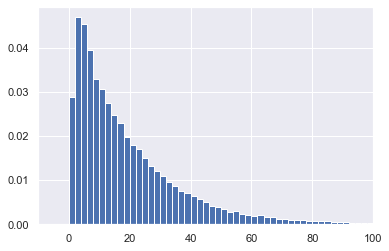

In [24]:
sns.set()
plt.figure()
ax = plt.gca()
plt.hist(weg_zuhause_arbeit, bins=range(0, int(max(weg_zuhause_arbeit) + 1), 2), density=True);
ax.set(xlim=(-10, 100))

# Lognormalverteilung

In [14]:
shape, loc, scale = stats.lognorm.fit(weg_zuhause_arbeit, floc=0 )

In [15]:
x = np.linspace(0, 1000, 1000)

In [16]:
pdf = stats.lognorm.pdf(x, s=shape, loc=0, scale=scale )

[(-10, 100)]

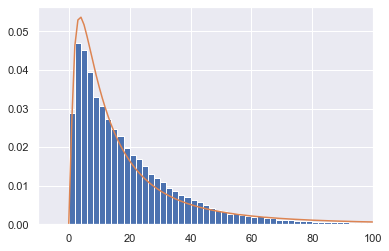

In [30]:
plt.figure()
ax = plt.gca()
plt.hist(weg_zuhause_arbeit, bins=range(0, int(max(weg_zuhause_arbeit) + 1), 2), density=True);
plt.plot(x, pdf)
ax.set(xlim=(-10, 100))

In [18]:
shape2, loc2, scale2 = stats.lognorm.fit(weg_zuhause_arbeit2, floc=0 )

In [19]:
pdf2 = stats.lognorm.pdf(x, s=shape2, loc=0, scale=scale2 )

[(-10, 100)]

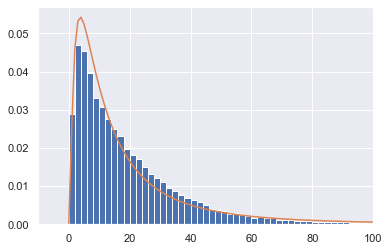

In [31]:
plt.figure()
ax = plt.gca()
plt.hist(weg_zuhause_arbeit2, bins=range(0, int(max(weg_zuhause_arbeit2) + 1), 2), density=True);
plt.plot(x, pdf2)
ax.set(xlim=(-10, 100))

# Gamma Verteilung

In [21]:
gamma_alpha, gamma_loc, gamma_beta = stats.gamma.fit(weg_zuhause_arbeit, floc=0)

In [22]:
pdf_gamma = stats.gamma.pdf(x, gamma_alpha, gamma_loc, gamma_beta)

[(-10, 100)]

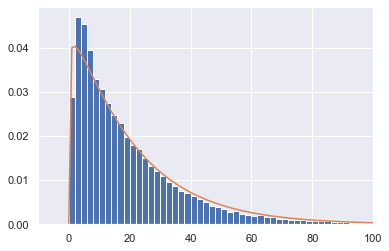

In [32]:
plt.figure()
ax = plt.gca()
plt.hist(weg_zuhause_arbeit, bins=range(0, int(max(weg_zuhause_arbeit) + 1), 2), density=True);
plt.plot(x, pdf_gamma)
ax.set(xlim=(-10, 100))